In [3]:
import tensorflow as tf
import os

Remove dodgy images

In [4]:
# import cv2
# import imghdr

In [5]:
# data_dir = 'data' 

In [6]:
# image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Load Data

In [8]:
import numpy as numpy
from matplotlib import pyplot as plt


In [12]:
import cv2
import imghdr

C:\Users\Biswaji Deb\AppData\Local\Temp\ipykernel_7984\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [13]:
data_dir = 'Affectnet Dataset'

In [14]:
os.listdir(data_dir)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [16]:
os.listdir(os.path.join(data_dir,'anger'))

['Anger_Split.txt',
 'image0000006.jpg',
 'image0000060.jpg',
 'image0000061.jpg',
 'image0000066.jpg',
 'image0000106.jpg',
 'image0000132.jpg',
 'image0000138.jpg',
 'image0000182.jpg',
 'image0000195.jpg',
 'image0000213.jpg',
 'image0000228.jpg',
 'image0000294.jpg',
 'image0000333.jpg',
 'image0000343.jpg',
 'image0000346.jpg',
 'image0000356.jpg',
 'image0000368.jpg',
 'image0000374.jpg',
 'image0000390.jpg',
 'image0000399.jpg',
 'image0000407.jpg',
 'image0000415.jpg',
 'image0000416.jpg',
 'image0000441.jpg',
 'image0000450.jpg',
 'image0000470.jpg',
 'image0000511.jpg',
 'image0000513.jpg',
 'image0000593.jpg',
 'image0000602.jpg',
 'image0000690.jpg',
 'image0000697.jpg',
 'image0000722.jpg',
 'image0000723.jpg',
 'image0000758.jpg',
 'image0000776.jpg',
 'image0000825.jpg',
 'image0000908.jpg',
 'image0000923.jpg',
 'image0000932.jpg',
 'image0000949.jpg',
 'image0000963.jpg',
 'image0000965.jpg',
 'image0000972.jpg',
 'image0000996.jpg',
 'image0001015.jpg',
 'image0001021

In [18]:
img=cv2.imread(os.path.join('Affectnet Dataset','anger','image0000006.jpg'))

In [19]:
img.shape

(96, 96, 3)

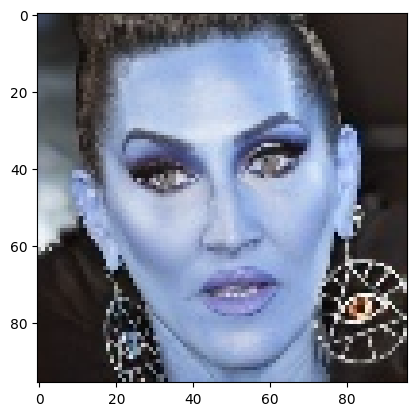

In [20]:
plt.imshow(img)

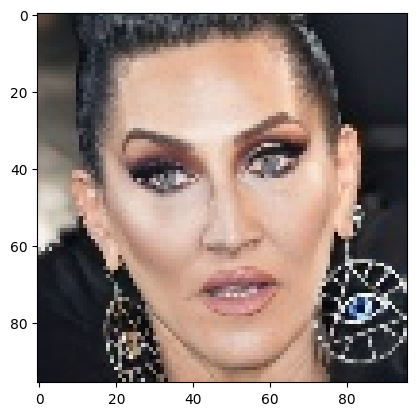

In [23]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
#tf.keras.utils.image_dataset_from_directory??

In [26]:
#Builiding data pipeline
data = tf.keras.utils.image_dataset_from_directory('Affectnet Dataset')
#still not a dataset, instead it's a generator

Found 29042 files belonging to 8 classes.


In [28]:
#Allows to loop through data pipeline
data_iterator = data.as_numpy_iterator()
data_iterator

In [32]:
batch = data_iterator.next()
#images represented as np arrays in batches of size 32
batch[0].shape

(32, 256, 256, 3)

In [34]:
#Images classified from 0-7
batch[1]

array([2, 4, 1, 3, 7, 5, 6, 7, 7, 1, 2, 1, 1, 4, 0, 5, 7, 1, 7, 1, 5, 6,
       5, 7, 7, 4, 7, 0, 3, 4, 0, 7])

In [31]:
len(batch)
#2 = images,it's labels

2

Anger = 0
Contempt = 1
disgust = 2
fear = 3
happy = 4
neutral = 5
sad = 6
Surprise = 7

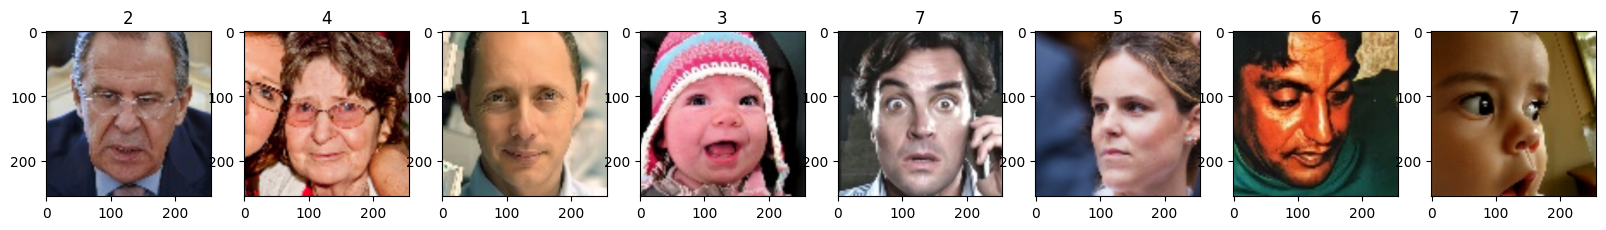

In [40]:
#To check the batch
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [41]:
batch = data_iterator.next()
batch[1]
#Images = batch[0] #Labels = bath[1]

array([7, 4, 5, 0, 1, 6, 0, 3, 7, 1, 0, 3, 5, 4, 6, 2, 4, 4, 0, 4, 0, 3,
       0, 4, 7, 3, 5, 3, 1, 4, 5, 3])

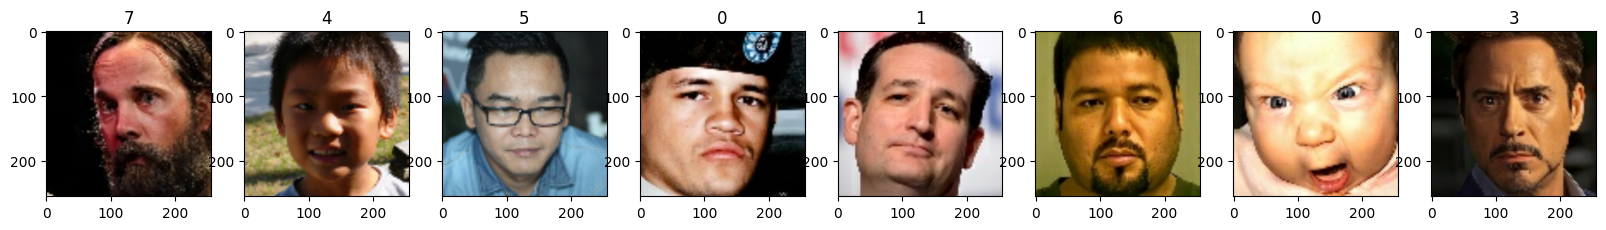

In [42]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocessing Data (Scaling,spliting between train,test)

In [43]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [44]:
scaled = batch[0]/255
print(scaled[0].min())
print(scaled[0].max())

0.0
1.0


Scaling all the data at one time while loading from pipeline instead of doing it in batches

In [45]:
data=data.map(lambda x,y:(x/255,y))

In [48]:
data.as_numpy_iterator().next()

(array([[[[1.72549024e-01, 1.52941182e-01, 1.37254909e-01],
          [1.71813726e-01, 1.52205884e-01, 1.36764705e-01],
          [1.67401955e-01, 1.47794113e-01, 1.33823529e-01],
          ...,
          [2.27941182e-02, 1.88725498e-02, 1.54411765e-02],
          [6.61764713e-03, 2.69607850e-03, 2.20588245e-03],
          [3.92156886e-03, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.79901958e-01, 1.60294116e-01, 1.44607842e-01],
          [1.78615198e-01, 1.59007356e-01, 1.43550858e-01],
          [1.70894608e-01, 1.51286766e-01, 1.37208953e-01],
          ...,
          [2.17218138e-02, 1.79074761e-02, 1.44761028e-02],
          [6.46446086e-03, 2.55821086e-03, 2.06801482e-03],
          [3.92156886e-03, 0.00000000e+00, 0.00000000e+00]],
 
         [[2.24019602e-01, 2.04411760e-01, 1.88725486e-01],
          [2.19424024e-01, 1.99816182e-01, 1.84267774e-01],
          [1.91850483e-01, 1.72242641e-01, 1.57521442e-01],
          ...,
          [1.52879898e-02, 1.21170348e-02, 8.6856

Spliting Test train 


In [49]:
#Total 908 batches and 32 images each ie; 32*908 = 29056
len(data)

908

In [52]:
traing_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

print(traing_size)
print(val_size)
print(test_size)
print(traing_size+val_size+test_size)

635
182
91
908


Take and skip method within tensorflow to split 

In [53]:
train=data.take(traing_size)
val=data.take(traing_size).take(val_size)
test = data.skip(traing_size+val_size).take(test_size)

In [54]:
len(test)

91

Creating CNN model

Building Deep learning model


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
#MaxPooling2D??

In [57]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))#Convolution layer 1
model.add(MaxPooling2D())#Pooling layer 1

model.add(Conv2D(32, (3,3), 1, activation='relu'))#Convolution layer 2
model.add(MaxPooling2D())#Pooling layer 2

model.add(Conv2D(16, (3,3), 1, activation='relu'))#Convolution layer 3
model.add(MaxPooling2D())#Pooling layer 3

model.add(Flatten())#Fully Connected layer

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))#Output layer

In [58]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Visualize CNN model

In [61]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='Neural_Network_Visualize.png') # write to disk
visualkeras.layered_view(model, to_file='Neural_Network_Visualize.png').show() # write and show

Train

In [62]:
logdir='logs'

In [63]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [64]:
Log_history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
635/635 [==============================] - 330s 518ms/step - loss: -3556020322304.0000 - accuracy: 0.0983 - val_loss: -23513945604096.0000 - val_accuracy: 0.0951
Epoch 2/20
635/635 [==============================] - 302s 476ms/step - loss: -248508535799808.0000 - accuracy: 0.0983 - val_loss: -749775393652736.0000 - val_accuracy: 0.0950
Epoch 3/20
635/635 [==============================] - 301s 473ms/step - loss: -2285976479072256.0000 - accuracy: 0.0979 - val_loss: -4751892223623168.0000 - val_accuracy: 0.0953
Epoch 4/20
635/635 [==============================] - 297s 468ms/step - loss: -9572478154178560.0000 - accuracy: 0.0983 - val_loss: -16366588135473152.0000 - val_accuracy: 0.0944
Epoch 5/20
635/635 [==============================] - 305s 479ms/step - loss: -27012077969211392.0000 - accuracy: 0.0981 - val_loss: -41063138640003072.0000 - val_accuracy: 0.0946
Epoch 6/20
635/635 [==============================] - 303s 477ms/step - loss: -60593909713076224.0000 - accuracy: 

Performance

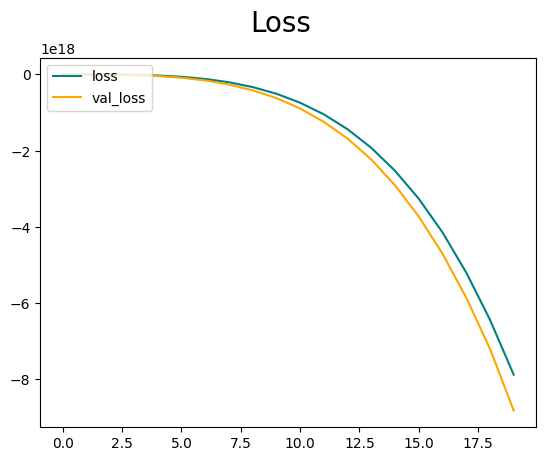

In [66]:
fig = plt.figure()
plt.plot(Log_history.history['loss'], color='teal', label='loss')
plt.plot(Log_history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

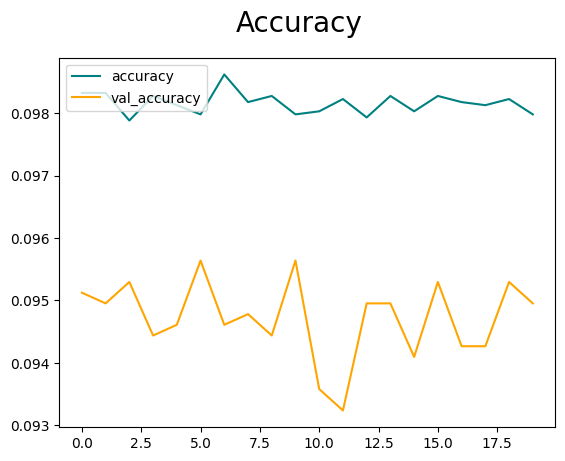

In [67]:
fig = plt.figure()
plt.plot(Log_history.history['accuracy'], color='teal', label='accuracy')
plt.plot(Log_history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate performance

In [68]:
from tensorflow.keras.metrics import Precision, Recall,BinaryAccuracy

In [69]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [70]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 114ms/step


In [72]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy : {acc.result().numpy()}')

Precision:0.8923395276069641, Recall:1.0, Accuracy : 0.10041407495737076


Test

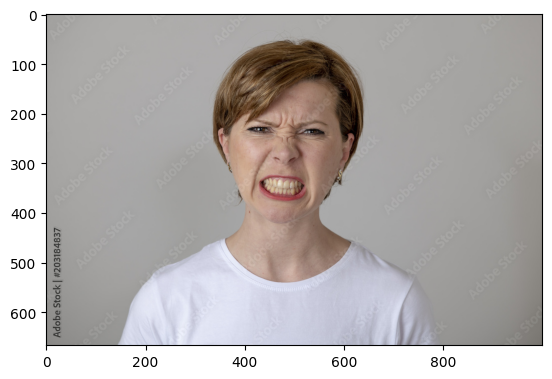

In [90]:
img = cv2.imread('test/angry2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

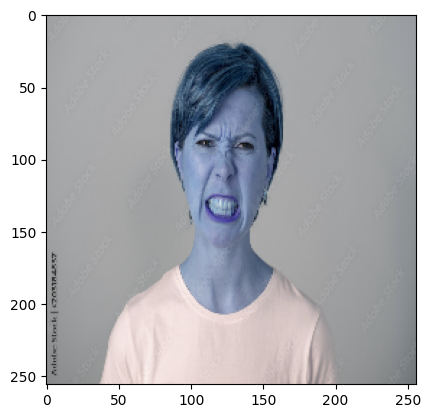

In [91]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [92]:
import numpy as np

In [96]:
resize.shape

TensorShape([256, 256, 3])

In [97]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [98]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 29ms/step


In [105]:

yhat

array([[1.]], dtype=float32)

In [95]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


Save the model

In [100]:
from tensorflow.keras.models import load_model

In [101]:
model.save(os.path.join('models','emotion_cnn.h5'))

C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [102]:
new_model = load_model(os.path.join('models','emotion_cnn.h5'))

In [103]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 77ms/step


array([[1.]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


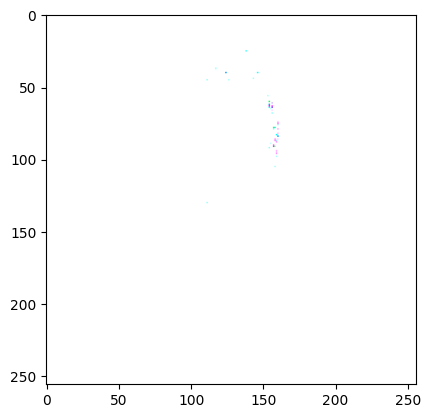

In [104]:
plt.imshow(resize)